In [1]:
import pandas as pd
import numpy as np

# TEMPLATE

# Day 10

In [5]:
day = 'day10'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

/Users/alixtiran-cappello/.pyenv/versions/3.7.12/envs/rotor/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


Series([], dtype: float64)

In [155]:
with open(day , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0      (({({({(({{<{{()<>}}>}}([<[(<>{})(()()))[[{}[]...
1      [{(<(<<([[[{(([]{})<(){}>)<{<>}(()[])>}]]{[([(...
2      ((<[([(({<<<{{<><>}({}<>)}{{<>{}}[[]()]}>>([<[...
3      [<[<({{({{[({[[][]]<{}<>>})<[<{}{}>]([<><>](<>...
4      [<{<<({[{{{(<({}()){{}[]}><(<><>)[[]{}]>)}<(([...
                             ...                        
97     <({{<(<([({<[{<>[]}]<[{}{}]{()[]}>>(({[]()}))}...
98     {[(([<([[<[<{[()]}>[<[<>{}][<><>]>{[()]{<>}}]]...
99     <<({<<<({(<<[<[]()>{[][]}][<{}{}>{[]<>}]>[{{<>...
100    [[[(<<(({[(((((){})(<>{}))<[[]()]{{}{})>)(<[()...
101    {[[{<[{([<[<{(<><>)}({{}}([][]))>]{{<[<>{}]>(<...
Length: 102, dtype: object

In [ ]:
def map_pattern(x):
    #x = x.split(": ")[1]
    x = x.split(',')
    return np.array(x, dtype=int)
          
data = file.apply(map_pattern).to_list()
#data = pd.DataFrame(data)
#data = data.astype(int)
data 

## Test

In [156]:
data = pd.DataFrame(file, columns=['string'])
data

,string
0,(({({({(({{<{{()<>}}>}}([<[(<>{})(()()))[[{}[]...
1,[{(<(<<([[[{(([]{})<(){}>)<{<>}(()[])>}]]{[([(...
2,((<[([(({<<<{{<><>}({}<>)}{{<>{}}[[]()]}>>([<[...
3,[<[<({{({{[({[[][]]<{}<>>})<[<{}{}>]([<><>](<>...
4,[<{<<({[{{{(<({}()){{}[]}><(<><>)[[]{}]>)}<(([...
...,...
97,<({{<(<([({<[{<>[]}]<[{}{}]{()[]}>>(({[]()}))}...
98,{[(([<([[<[<{[()]}>[<[<>{}][<><>]>{[()]{<>}}]]...
99,<<({<<<({(<<[<[]()>{[][]}][<{}{}>{[]<>}]>[{{<>...
100,[[[(<<(({[(((((){})(<>{}))<[[]()]{{}{})>)(<[()...


## Prep

In [165]:
# Python3 code to Check for 
# balanced parentheses in an expression
open_list = ["[","{","(", '<']
close_list = ["]","}",")", '>']

matching = { 
    ')': 3,
            
    "]": 57,
'}': 1197,
'>': 25137
}

In [158]:
# Function to check parentheses
def check(myStr):
    stack = []
    for i in myStr:
        if i in open_list:
            stack.append(i)
        elif i in close_list:
            pos = close_list.index(i)
            if ((len(stack) > 0) and
                (open_list[pos] == stack[len(stack)-1])):
                stack.pop()
            else:
                return "Corrupted", i
    if len(stack) == 0:
        return "Balanced", None
    else:
        return "Unbalanced", None
  
  
# Driver code
string = "{[]{()}}"
print(string,"-", check(string))
  
string = "[{}{})(]"
print(string,"-", check(string))
  
string = "((()"
print(string,"-",check(string))

{[]{()}} - ('Balanced', None)
[{}{})(] - ('Corrupted', ')')
((() - ('Unbalanced', None)


## Part 1

In [159]:
data['status']= data.string.apply(check)

In [160]:
data['char'] = data.status.apply(lambda x: x[1])

In [161]:
data['status'] = data.status.apply(lambda x: x[0])

In [162]:
data

,string,status,char
0,(({({({(({{<{{()<>}}>}}([<[(<>{})(()()))[[{}[]...,Corrupted,)
1,[{(<(<<([[[{(([]{})<(){}>)<{<>}(()[])>}]]{[([(...,Unbalanced,None
2,((<[([(({<<<{{<><>}({}<>)}{{<>{}}[[]()]}>>([<[...,Corrupted,}
3,[<[<({{({{[({[[][]]<{}<>>})<[<{}{}>]([<><>](<>...,Corrupted,}
4,[<{<<({[{{{(<({}()){{}[]}><(<><>)[[]{}]>)}<(([...,Unbalanced,None
...,...,...,...
97,<({{<(<([({<[{<>[]}]<[{}{}]{()[]}>>(({[]()}))}...,Unbalanced,None
98,{[(([<([[<[<{[()]}>[<[<>{}][<><>]>{[()]{<>}}]]...,Unbalanced,None
99,<<({<<<({(<<[<[]()>{[][]}][<{}{}>{[]<>}]>[{{<>...,Unbalanced,None
100,[[[(<<(({[(((((){})(<>{}))<[[]()]{{}{})>)(<[()...,Corrupted,)


In [167]:
summary = pd.DataFrame(data.char.value_counts()).reset_index()
summary

,index,char
0,),17
1,>,15
2,},10
3,],9


In [168]:
summary['index'] = summary['index'].map(matching)

In [169]:
(summary['index'] * summary.char).sum()

389589

## Part 2

In [170]:
# Function to check parentheses
def check(myStr):
    stack = []
    unba = []
    for i in myStr:
        if i in open_list:
            stack.append(i)
        elif i in close_list:
            pos = close_list.index(i)
            if ((len(stack) > 0) and
                (open_list[pos] == stack[len(stack)-1])):
                stack.pop()
            else:
                return "Corrupted", i
    if len(stack) == 0:
        return "Balanced", None
    else:
        return stack

In [171]:
unba = data[data.status == 'Unbalanced']
unba = unba[['string']]

In [173]:
unba['list'] = unba.string.apply(check)

In [175]:
matcher = { 
    '(': 1,   
    "[": 2,
'{': 3,
'<': 4
}

In [176]:
def count_point(stack):
    count = 0
    stack.reverse()
    for item in stack:
        count *= 5
        count += matcher[item]
    return count

In [177]:
unba['res'] = unba['list'].apply(count_point)

In [179]:
res = unba['res'].sort_values().reset_index(drop='True')

In [180]:
res[len(res) // 2]

1190420163

# Day 11

In [3]:
day = 'day11'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0    5483143223
1    2745854711
2    5264556173
3    6141336146
4    6357385478
5    4167524645
6    2176841721
7    6882881134
8    4846848554
9    5283751526
dtype: object

In [4]:
with open(day , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0    5212166716
1    1567322581
2    2268461548
3    3481561744
4    6248342248
5    6526667368
6    5627335775
7    8124511754
8    4614137683
9    4724561156
dtype: object

In [5]:
def map_pattern(x):
    #x = x.split(": ")[1]
    x = [it for it in x]
    return np.array(x, dtype=int)
          
data = file.apply(map_pattern).to_list()
data = pd.DataFrame(data)
#data = data.astype(int)
#data  = data.to_numpy()
data

,0,1,2,3,4,5,6,7,8,9
0,5,2,1,2,1,6,6,7,1,6
1,1,5,6,7,3,2,2,5,8,1
2,2,2,6,8,4,6,1,5,4,8
3,3,4,8,1,5,6,1,7,4,4
4,6,2,4,8,3,4,2,2,4,8
5,6,5,2,6,6,6,7,3,6,8
6,5,6,2,7,3,3,5,7,7,5
7,8,1,2,4,5,1,1,7,5,4
8,4,6,1,4,1,3,7,6,8,3
9,4,7,2,4,5,6,1,1,5,6


## Part 1

In [7]:
import itertools

def limit_range(coordo):
    return max(coordo-1, 0), min(coordo+2, 10)

def upgrade_next(x, y):
    positions = []
    a = np.arange(*limit_range(x))
    b = np.arange(*limit_range(y))
    
    positions = itertools.product(a,b)         
    return list(positions)

def run(df, n_runs):
    data = df.copy()
    flashes = 0
    
    for run in range(n_runs):
        data = data + 1
        xs, ys = np.where(data > 9)
        
        while len(xs) > 0:
        
            flashes += len(xs)
            
            positions = []
            for x, y in zip(xs, ys):
                # add new positions to upgrade to list
                positions += upgrade_next(x, y)
                
                # Reset count once count passes 9
                data.iloc[x, y] = 0
            
            # update df if value is not a zero
            for x, y in positions:
                if data.iloc[x, y] > 0:
                    data.iloc[x, y] += 1
            
            xs, ys = np.where(data > 9)
            
    return flashes

In [8]:
run(data, 100) 

1719

In [10]:
"réponse 1719"

'réponse 1719'

## Part 2

In [18]:
def run(df):
    data = df.copy()
    flashes = 0
    run = 0
    
    while True:
        run += 1
        data = data + 1
        
        xs, ys = np.where(data > 9)
        x_to_reset = [] 
        y_to_reset = []
        while len(xs) > 0:
            x_to_reset += xs.tolist() 
            y_to_reset += ys.tolist()
            
            positions = []
            flashes += len(xs)

            for i in range(len(xs)):
                pos = upgrade_next(xs[i], ys[i])
                positions += pos

            positions = pd.DataFrame(positions, columns=['x', 'y'])

            cond = (
                ((positions.x >= 0) & (positions.x <= 9))
                &
                ((positions.y >= 0) & (positions.y <= 9))
            )
            positions = positions[cond]

            # update df
            for idx, row in positions.iterrows():
                data.iloc[row['x'], row['y']] += 1
            
            for x, y in zip(xs, ys):
                data.iloc[x, y] = 0
            xs, ys = np.where(data > 9)
            
            
        for x, y in zip(x_to_reset, y_to_reset):
                data.iloc[x, y] = 0
        
        if (data == 0).sum().sum() == 100:
            return run
        
    return flashes, data

In [19]:
run(data)

351

In [106]:
"réponse 382"

'réponse 382'

# Day 12

## Preparation

In [2]:
day = 'day12'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0      dc-end
1    HN-start
2    start-kj
3    dc-start
4       dc-HN
5       LN-dc
6      HN-end
7       kj-sa
8       kj-HN
9       kj-dc
dtype: object

In [324]:
with open(day , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0     start-qs
1        qs-jz
2     start-lm
3        qb-QV
4        QV-dr
5       QV-end
6        ni-qb
7        VH-jz
8        qs-lm
9       qb-end
10       dr-fu
11       jz-lm
12    start-VH
13       QV-jz
14       VH-qs
15       lm-dr
16       dr-ni
17       ni-jz
18       lm-QV
19       jz-dr
20      ni-end
21       VH-dr
22       VH-ni
23       qb-HE
dtype: object

In [11]:
def map_pattern(x):
    #x = x.split(": ")[1]
    #x = x.split(',')
    return np.array(x, dtype=int)
          
data = file.apply(map_pattern).to_list()
#data = pd.DataFrame(data)
#data = data.astype(int)
data 

[5212166716,
 1567322581,
 2268461548,
 3481561744,
 6248342248,
 6526667368,
 5627335775,
 8124511754,
 4614137683,
 4724561156]

## Test

In [327]:
import re

class PathFinder:
    def __init__(self, chemins):
        self.chemins = chemins
        self.visited_path = []

    def find_path(self, visits, point='start'):
        # first item start
        point = f'-{point}|{point}-'

        # find all path with first item
        # remove first item from path 
        # remove dash
        paths = [item for item in self.chemins if re.search(point, item) ]
        paths = [re.sub(point, '', p) for p in paths]
        paths 

        if len(visits) == 0:
            visited = ['start']
        else:
            visited = visits.copy()

            
        # new point to start with
        for new_point in paths:

            if new_point.islower() and new_point in visited:
                continue
            
            if new_point == "end":
                
                visited.append(new_point)
                self.visited_path.append(visited)
                #print('path saved', visited, '\n')
                visited.pop()
                continue
            
            
            #if new_point not in visited:
            visited.append(new_point)
            a = self.find_path(visited, new_point)
            
            if a == 'dead':
                visited.pop()
                continue
            
        
        return 'dead'
        # call function from there

finder = PathFinder(file)


finder.find_path([])

res = sorted([','.join(line) for line in finder.visited_path])
len(res)

5178

In [326]:
test = """start,A,b,A,c,A,end
start,A,b,A,end
start,A,b,end
start,A,c,A,b,A,end
start,A,c,A,b,end
start,A,c,A,end
start,A,end
start,b,A,c,A,end
start,b,A,end
start,b,end""".split('\n')

In [232]:
res == test

False

## Part 1

In [332]:
day = 'day12'
with open(f'{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0       ax-end
1        xq-GF
2       end-xq
3        im-wg
4        ax-ie
5     start-ws
6        ie-ws
7     CV-start
8        ng-wg
9        ng-ie
10       GF-ng
11       ng-av
12      CV-end
13       ie-GF
14       CV-ie
15       im-xq
16    start-GF
17       GF-ws
18       wg-LY
19       CV-ws
20       im-CV
21       CV-wg
dtype: object

0      dc-end
1    HN-start
2    start-kj
3    dc-start
4       dc-HN
5       LN-dc
6      HN-end
7       kj-sa
8       kj-HN
9       kj-dc
dtype: object

In [30]:
paths = [string for string in file  if CHEMINS in string]
paths = [string.replace(CHEMINS, '').replace('-', '') for string in paths]
paths

['start', 'dc', 'end', 'kj']

In [14]:
def get_paths_from_point(point, paths_from_file=file):
    # find all path with a given point 
    # keep only the other point in those paths
    paths = [string for string in paths_from_file if point in string]
    paths = [string.replace(point, '').replace('-', '') for string in paths]
    return paths

def find_path(visits=[], point='start', os=''):
    if len(visits) == 0:
        visited = ['start']
    else:
        visited = visits.copy()
    
    global res

    # Begin search among possible paths
    paths = get_paths_from_point(point)
    for new_point in paths:
        one_shot = os

        if new_point == "end": # Saves results in global variable
            res.append(visited)
            continue

        if new_point.islower() and new_point in visited:
            if new_point == 'start':
                continue
            else: 
                if one_shot == '':
                    one_shot = new_point
                else:
                    if visited.count(one_shot) > 1:
                        continue 

        visited.append(new_point)
        a = find_path(visited, new_point, one_shot)

        if a == 'dead':
            visited.pop()
            continue

    return 'dead'


In [15]:
res = []
find_path()
len(res)

103

# Day 13

## Preparation

In [241]:
day = 'day13'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0               6,10
1               0,14
2               9,10
3                0,3
4               10,4
5               4,11
6                6,0
7               6,12
8                4,1
9               0,13
10             10,12
11               3,4
12               3,0
13               8,4
14              1,10
15              2,14
16              8,10
17               9,0
18                  
19    fold along y=7
20    fold along x=5
dtype: object

In [394]:
with open(day , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0               388,758
1                82,197
2               689,684
3               140,677
4                616,14
             ...       
1029    fold along y=55
1030    fold along x=40
1031    fold along y=27
1032    fold along y=13
1033     fold along y=6
Length: 1034, dtype: object

In [395]:
fold = [f.split('along ')[1] for f in file if 'fold' in f]
xy = [f.split(',') for f in file if ',' in f]

In [397]:
data = pd.DataFrame(xy, columns=['x', 'y']).astype(int)

In [399]:
grid = np.ones(( data.y.max()+1, data.x.max()+1))
grid = np.where(grid ==1, '.', grid)
#grid = pd.DataFrame(grid)

In [401]:
for idx, row in data.iterrows():
    grid[row['y'], row['x']] = "#"
    #print(row['x'],row['y'])

In [402]:
grid

array([['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ...,
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.']], dtype='<U32')

In [403]:
def split_grid(grid, dic_entry):
    axis, value = dic_entry.split('=')
    value = int(value)
    if axis=='y':
        first_grid = grid[:value][:]
        second_grid = grid[value+1:][:]
        second_grid = np.flip(second_grid, 0)
    
    if axis=='x':
        first_grid = grid[:, :value]
        second_grid = grid[:, value+1:]
        second_grid = np.flip(second_grid, 1)
        
    return first_grid, second_grid

In [404]:
def fold_grid(grid, fold):
    for f in fold:
        a, b = split_grid(grid, f)
        if f[0] == 'x':
            grid = merge_on_x(a,b)
        else:
            grid = merge_on_y(a, b)
    return grid

In [406]:
def merge_on_y(a, b):
    for idxb, tempb in enumerate(b[::-1][:]):
        tempa = a[-1-idxb, :]
        replace = np.where(tempb=="#", "#", tempa)
        a[-1-idxb, :] = replace
    return a

In [407]:
def merge_on_x(a,b ):
    for idxb, tempb in enumerate(b[:, ::-1].T):
        tempa = a[:, -1-idxb ]
        replace = np.where(tempb=="#", "#", tempa)
        a[:, -1-idxb] = replace
    return a

In [405]:
a, b = split_grid(grid, fold[0])

In [408]:
a = merge_on_y(a, b)

In [355]:
one = merge_on_x(a, b)

In [409]:
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{'#': 842, '.': 585383}

## Part 2

In [410]:
res = fold_grid(grid, fold)

In [411]:
res = np.where(res=='.', 0, res)
res = np.where(res=='#', 1, res)

In [412]:
res = pd.DataFrame(res).astype(int)

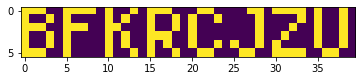

In [413]:
import matplotlib.pyplot as plt
plt.imshow(res)

# Day 14

## Preparation

In [168]:
day = 'day14'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0        NNCB
1            
2     CH -> B
3     HH -> N
4     CB -> H
5     NH -> C
6     HB -> C
7     HC -> B
8     HN -> C
9     NN -> C
10    BH -> H
11    NC -> B
12    NB -> B
13    BN -> B
14    BB -> N
15    BC -> B
16    CC -> N
17    CN -> C
dtype: object

In [145]:
with open(day , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0      SVKVKCCBNHNSOSCCOPOC
1                          
2                   KK -> B
3                   CS -> P
4                   VV -> O
               ...         
97                  HN -> V
98                  OK -> O
99                  FF -> V
100                 CV -> V
101                 PP -> V
Length: 102, dtype: object

In [146]:
rule = file[0]
def map_pattern(x):
    #x = x.split(": ")[1]
    x = x.split(' -> ')
    return x
          
data = file[2:].apply(map_pattern).to_list()
#data = pd.DataFrame(data)
#data = data.astype(int)
#data = {x[0]: x[0][0] + x[1] + x[0][1]  for x in data}
data = {x[0]: x[1]   for x in data}

#data

## Test

In [179]:
rule = file[0]

In [180]:
from collections import Counter
count = Counter(rule)

In [181]:
for _ in range(10):
    to_insert = [data[rule[i:i+2]] for i in range(len(rule)-1)]

    rule = [i for i in rule]

    for i, lett in enumerate(to_insert):
        rule.insert((2*i+1), lett)

    count.update(to_insert)
    print((count))

    rule = ''.join(rule) 

Counter({'N': 2, 'C': 1, 'B': 1, 'K': 1, 'S': 1, 'V': 1})
Counter({'N': 3, 'C': 2, 'S': 2, 'V': 2, 'B': 1, 'K': 1, 'H': 1, 'P': 1})
Counter({'N': 4, 'C': 4, 'S': 4, 'V': 4, 'B': 3, 'K': 3, 'H': 1, 'P': 1, 'O': 1})
Counter({'C': 8, 'K': 8, 'N': 7, 'V': 7, 'S': 6, 'O': 4, 'B': 3, 'H': 3, 'P': 2, 'F': 1})
Counter({'K': 18, 'N': 14, 'C': 14, 'V': 13, 'S': 11, 'H': 9, 'B': 7, 'O': 6, 'F': 3, 'P': 2})
Counter({'K': 37, 'C': 29, 'N': 26, 'V': 22, 'S': 19, 'H': 19, 'B': 15, 'O': 15, 'P': 6, 'F': 5})
Counter({'K': 72, 'C': 57, 'N': 47, 'V': 40, 'H': 40, 'B': 39, 'S': 36, 'O': 29, 'P': 13, 'F': 12})
Counter({'K': 145, 'C': 118, 'N': 89, 'B': 88, 'V': 82, 'H': 69, 'S': 65, 'O': 64, 'P': 26, 'F': 23})
Counter({'K': 282, 'C': 239, 'B': 182, 'N': 167, 'V': 158, 'H': 147, 'S': 131, 'O': 128, 'P': 53, 'F': 50})
Counter({'K': 559, 'C': 493, 'B': 387, 'V': 313, 'N': 311, 'H': 280, 'O': 266, 'S': 260, 'P': 104, 'F': 100})


In [154]:
max(count.values()) - min(count.values()) 

67655

In [144]:
count

Counter({'N': 865, 'C': 298, 'B': 1749, 'H': 161})

## Part 1

True

# day 15

In [185]:
day = 'day15'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0    1163751742
1    1381373672
2    2136511328
3    3694931569
4    7463417111
5    1319128137
6    1359912421
7    3125421639
8    1293138521
9    2311944581
dtype: object

In [218]:
with open(f'{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0     4762999789865789979838469132535949928924821629...
1     2878689389148477519999123173439839916421859766...
2     4681844686577988929825996716999999595142263859...
3     9336787159699929348236396957149575286918149176...
4     4412778865289876989817697439991158316498888846...
                            ...                        
95    8896972417796897466198771849598333659811593287...
96    8929197695685946989955451996992847784359198649...
97    7758493985827548487978389978352561798197251191...
98    9596899189247929998998329673792729789795579158...
99    4868743394828817989695434879853789734813996791...
Length: 100, dtype: object

In [222]:
def map_pattern(x):
    #x = x.split(": ")[1]
    x = [i for i in x]
    return np.array(x, dtype=int)
          
data = file.apply(map_pattern).to_list()
data = pd.DataFrame(data)
#data = data.astype(int)
data = data.to_numpy()
data

array([[4, 7, 6, ..., 7, 4, 9],
       [2, 8, 7, ..., 8, 8, 6],
       [4, 6, 8, ..., 9, 4, 2],
       ...,
       [7, 7, 5, ..., 6, 7, 8],
       [9, 5, 9, ..., 9, 9, 5],
       [4, 8, 6, ..., 9, 3, 9]])

## Test

In [220]:
def minPathSum(grid):
    rows = len(grid)
    cols = len(grid[0])
    
    # first row
    for i in range(1, cols):
        grid[0][i] += grid[0][i-1]
    
    # first col
    for i in range(1, rows):
        grid[i][0] += grid[i-1][0]
    # inner cells
    for i in range(1, rows):
        for j in range(1, cols):
            grid[i][j] += min(grid[i-1][j], grid[i][j-1])
    return grid[-1][-1]

In [221]:
minPathSum(data) - data[0, 0]

745

## Part 1

In [274]:
np.array(data)

array([[4, 7, 6, ..., 7, 4, 9],
       [2, 8, 7, ..., 8, 8, 6],
       [4, 6, 8, ..., 9, 4, 2],
       ...,
       [7, 7, 5, ..., 6, 7, 8],
       [9, 5, 9, ..., 9, 9, 5],
       [4, 8, 6, ..., 9, 3, 9]])

In [282]:
tile = np.tile(data, (5, 5))

tile.shape

(500, 500)

In [283]:
for i in range(tile.shape[0]):
    for j in range(tile.shape[1]):
        i_, j_ = i//100, j//100
        adder = i_ + j_
        tile[i, j] += adder
        if tile[i, j] > 9:
            tile[i, j] -=9
        

In [284]:
tile

array([[4, 7, 6, ..., 2, 8, 4],
       [2, 8, 7, ..., 3, 3, 1],
       [4, 6, 8, ..., 4, 8, 6],
       ...,
       [2, 2, 9, ..., 5, 6, 7],
       [4, 9, 4, ..., 8, 8, 4],
       [8, 3, 1, ..., 8, 2, 8]])

In [285]:
minPathSum(tile) - tile[0, 0]

3012

## Part 2

In [257]:
import numpy as np
import matplotlib.pyplot as plt

carte = tile
carte[0,0]=0
min_val, max_val = 500, 500
#carte[max_val-1,max_val-1]=0

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.matshow(carte, ccarte=plt.cm.Blues, vmin=0, vmax=20)
for i in range(max_val):
    for j in range(max_val):
      c = carte[j,i]
      ax.text(i, j, str(c), va='center', ha='center')

In [268]:
from heapq import heappop, heappush

with open("day15") as f:
    data = [list(map(int, line)) for line in f.read().strip().split("\n")]
def shortest_distance(t):
    heap = [(0, 0, 0)]
    seen = {(0, 0)}
    while heap:
        distance, x, y = heappop(heap)
        if x == t * len(data) - 1 and y == t * len(data[0]) - 1:
            return distance

        for dx, dy in ((0, 1), (0, -1), (1, 0), (-1, 0)):
            x_, y_ = x + dx, y + dy
            if x_ < 0 or y_ < 0 or x_ >= t * len(data) or y_ >= t * len(data):
                continue

            a, am = divmod(x_, len(data))
            b, bm = divmod(y_, len(data[0]))
            n = ((data[am][bm] + a + b) - 1) % 9 + 1

            if (x_, y_) not in seen:
                seen.add((x_, y_))
                heappush(heap, (distance + n, x_, y_))


In [269]:
shortest_distance(1)

745

In [270]:
shortest_distance(5)

3002

# day 16

In [148]:
hexa = """0 = 0000
1 = 0001
2 = 0010
3 = 0011
4 = 0100
5 = 0101
6 = 0110
7 = 0111
8 = 1000
9 = 1001
A = 1010
B = 1011
C = 1100
D = 1101
E = 1110
F = 1111"""
hexa = hexa.split('\n')

hexa = {x.split(' = ')[0]:x.split(' = ')[1] for x in hexa}
hexa


{'0': '0000',
 '1': '0001',
 '2': '0010',
 '3': '0011',
 '4': '0100',
 '5': '0101',
 '6': '0110',
 '7': '0111',
 '8': '1000',
 '9': '1001',
 'A': '1010',
 'B': '1011',
 'C': '1100',
 'D': '1101',
 'E': '1110',
 'F': '1111'}

In [149]:
test = [hexa[i] for i in 'D2FE28']
test = ''.join(test)
test == '110100101111111000101000'

True

In [150]:
test = [hexa[i] for i in '38006F45291200']
test = ''.join(test)
test == '00111000000000000110111101000101001010010001001000000000'

True

In [25]:
def get_header_type(string):
    header = string[0:3]
    typeid = string[3:6]
    rest = string[6:]
    return header, typeid, rest

get_header_type(test)

('110', '100', '101111111000101000')

In [169]:
def split_package(pck):
    bits = []
    for i in range(len(pck)//5):
        sub = pck[i*5:(i*5+5)]
        bits.append(sub)
        if sub[0] == '0':
            break
    bits = [b[1:] for b in bits]
    bits = ''.join(bits)
        
    return int(bits, 2), pck[(i+1)*5:]
split_package( '101111111000101000')

(2021, '000')

In [191]:
def parse_operator(chars):
    l = chars[0]
    chars = chars[1:]
    if l == '0': # length of 15
        ope = chars[0:15]
        ope = int(ope, 2)
        chars = chars[15:]
        bits = [int(chars[:11], 2), int(chars[11:ope], 2)]
        print('length', ope)
        rest = chars[ope:] 
        return bits, rest
    if l == '1':
        ope = int(chars[0:11], 2)
        print(ope)
        chars = chars[11:]
        packs = [chars[i*11:(i+1)*11] for i in range(ope)]
        rest = chars[(ope)*11:]
        return [pckg for pckg in packs], rest

In [133]:
parse_operator('00000000000110111101000101001010010001001000000000')

([1674, 21028], '0000000')

In [134]:
parse_operator('1101010000000000000101111010001111000')

ValueError: invalid literal for int() with base 2: ''

In [143]:
def convert_hexa(hexadecimal):
    string = [hexa[i] for i in hexadecimal]
    string = ''.join(string)
    return string
    

In [189]:
def parse_one_step(string):
    head, typeid, rest = get_header_type(string)
    if typeid == '100':
        info, rest = split_package(rest)
        
    else:
        info, rest = parse_operator(rest)

    res = {'h': int(head, 2), 'type':int(typeid, 2), 'info':info}
    return res, rest

In [155]:
parsed_data =[]
def parse_whole_string(string):
    global parsed_data
    while len(string) > 6 :
        
    
        parsed_data.append(res)
        
        string = rest
    
    return data, rest

In [156]:
teststring='11101110000000001101010000001100100000100011000001100111000000000000110111101000101001010010001001000011100000000000011011110100010100101001000100100110100101111111000101'

In [157]:
parse_whole_string(teststring)
#parse_whole_string()

([{'h': 7, 'type': 3, 'info': [641, 1154, 387]},
  {'h': 1, 'type': 6, 'info': [1674, 21028]},
  {'h': 1, 'type': 6, 'info': [1674, 21028]},
  {'h': 6, 'type': 4, 'info': 2021}],
 '')

In [192]:
data = '620080001611562C8802118E34'
data = convert_hexa(data)
print(data)
print(parse_one_step(data))
parse_one_step('0001000101010110001011001000100000000010000100011000111000110100')

01100010000000001000000000000000000101100001000101010110001011001000100000000010000100011000111000110100
2
({'h': 3, 'type': 0, 'info': ['00000000000', '00000010110']}, '0001000101010110001011001000100000000010000100011000111000110100')


({'h': 0, 'type': 4, 'info': 10},
 '10110001011001000100000000010000100011000111000110100')

In [180]:
parse_one_step('100000000001001010100000000001101010000000000000101111010001111000')

({'h': 4, 'type': 0, 'info': [13, 2147677304]}, '')

In [174]:
parse_operator('000001001010100000000001101010000000000000101111010001111000')

([13, 2147677304], '')

In [178]:
int('00001001010', 2)

74

In [175]:
convert_hexa('2147677304')

'0010000101000111011001110111001100000100'

In [177]:
parse_one_step('0010000101000111011001110111001100000100')

({'h': 1, 'type': 0, 'info': [1766, 4]}, '')

In [2]:
day = 'day16'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

/Users/alixtiran-cappello/.pyenv/versions/3.7.12/envs/rotor/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


Series([], dtype: float64)

In [3]:
with open(day , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

/Users/alixtiran-cappello/.pyenv/versions/3.7.12/envs/rotor/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


Series([], dtype: float64)

In [4]:
def map_pattern(x):
    #x = x.split(": ")[1]
    x = x.split(',')
    return np.array(x, dtype=int)
          
data = file.apply(map_pattern).to_list()
#data = pd.DataFrame(data)
#data = data.astype(int)
data 

[]

# Day 17

In [13]:
class Probe:
    def __init__(self, vx, vy):
        self.x = 0
        self.y = 0
        self.vx = vx
        self.vy = vy
        self.initial = (vx, vy)
        self.azimut = 0
    
    def make_one_step(self):
        # moves
        self.x += self.vx
        self.y += self.vy
        
        # Update velocity
        self.vy -= 1
        
        # Rules for updating x velocity
        if self.vx > 0:
            self.vx -= 1
        elif self.vx < 0:
            self.vx += 1
        else:
            pass
        
    def check_for_failure(self):
        failure_condition = (
            ((self.x < target['xmin']) & (self.vx <= 0)) |
            ((self.x > target['xmax']) & (self.vx >= 0)) |
            ((self.y < target['ymin']) & (self.vy <= 0))
        )
        return failure_condition
    
    def check_for_success(self):
        condition = (
            (self.x >= target['xmin']) & 
            (self.x <= target['xmax']) &
            (self.y >= target['ymin']) & 
            (self.y <= target['ymax'])
        )
        return condition
        
    def shoot(self):
        status = True
        
        while status == True:
            self.make_one_step()
            success = self.check_for_success()
            failure = self.check_for_failure()
            self.azimut = max(self.azimut, self.y)
            
            if success:
                return self.azimut
            if failure:
                return None
                
    def __repr__(self):
        position = (self.x, self.y)
        speed = (self.vx, self.vy)
        return f'Position: {position}, speed: {speed}, max_y: {self.azimut}'

In [14]:
# training
target = {'xmin':20, 'xmax':30, 'ymin':-10, 'ymax':-5}

In [15]:
# Input
target = {'xmin':287, 'xmax':309, 'ymin':-76, 'ymax':-48}

In [58]:
test = []
for i in range(1, 200):
    for j in range(-100, 200):
        probe = Probe(i, j)
        res = probe.shoot()
        if res is not None:
            test.append([(i, j), res]) 

In [59]:
results = pd.DataFrame(test, columns=['init', 'ymax'])

In [60]:
results

,init,ymax
0,"(6, 0)",0
1,"(6, 1)",1
2,"(6, 2)",3
3,"(6, 3)",6
4,"(6, 4)",10
...,...,...
107,"(30, -9)",0
108,"(30, -8)",0
109,"(30, -7)",0
110,"(30, -6)",0


In [16]:
trajectory = []
for i in range(1, 1000):
    for j in range(-1000, 1000):
        probe = Probe(i, j)
        res = probe.shoot()
        if res is not None:
            trajectory.append([(i, j), res]) 
        

In [19]:
results = pd.DataFrame(trajectory, columns=['init', 'ymax'])

In [20]:
results.ymax.max()

2850

In [21]:
len(results.init.drop_duplicates())

1117

In [22]:
results

,init,ymax
0,"(24, 6)",21
1,"(24, 7)",28
2,"(24, 8)",36
3,"(24, 9)",45
4,"(24, 10)",55
...,...,...
1112,"(309, -52)",0
1113,"(309, -51)",0
1114,"(309, -50)",0
1115,"(309, -49)",0


# Day 18

In [2]:
def parse_string(string):
    string = str(string)
    level = 0
    for idx, char in enumerate(string):
        if char == '[':
            level += 1
        elif char == ']':
            level -= 1
        elif char  in [' ', ',']:
            continue
        elif int(char) in [1,2,3,4,5,6,7,8,9,0]:
            yield (int(char), level)


def format_input(string):
    gen = parse_string(string)
    return pd.DataFrame(gen, columns=['num', 'depth'])

In [119]:
# get the deepest layer
def get_indexes_with_max_depth(df):
    depth_four = df[df.depth >= 5]
    #depth_four = depth_four.rename_axis('MyIdx').sort_values(by = ['depth', 'MyIdx'], ascending = [False, True])
    if len(depth_four)%2 == 0:
        depth_four = depth_four.index
        depth_four = depth_four.to_numpy().reshape((-1, 2))
    else:
        pairs = depth_four.depth.value_counts()
        pairs = pairs.index[pairs%2 == 0]
        depth_four = depth_four[depth_four.depth.isin(pairs)]
        depth_four = depth_four.index
        depth_four = depth_four.to_numpy().reshape((-1, 2))

    depth_four = [item for item in depth_four if df.depth[item[0]] == df.depth[item[1]]]
    print(depth_four)
    depth_four = depth_four[0]
    return depth_four[0],depth_four[1]


In [120]:
def explode(df):
    #while df.depth.max() >= 5:
    try:
        tempa, tempb = get_indexes_with_max_depth(df)
    except:
        import ipdb; ipdb.set_trace()
    
    ## Deal with limit at the begining of the array
    if tempb == len(df)-1:
        df.num[tempa-1] += df.num[tempa]
        df.num[tempa] = 0
        df.depth[tempa] -= 1
        df = df.drop(tempb, axis=0).reset_index(drop=True)

    ## Deal with limit at the begining of the array
    if tempa == 0:
        df.num[tempb+1] += df.num[tempb]
        df.num[tempb] = 0
        df.depth[tempb] -= 1
        df = df.drop(tempa, axis=0).reset_index(drop=True)

    # General case
    if  (tempb < len(df)-1) and (tempa > 0):
        # Update on both sides
        df.num[tempa-1] += df.num[tempa]
        df.num[tempb+1] += df.num[tempb]

        if df.depth[tempa-1] < df.depth[tempb+1]:
            df.num[tempb] = 0
            df.depth[tempb] -= 1
            df = df.drop(tempa, axis=0).reset_index(drop=True)
        else:
            df.num[tempa] = 0
            df.depth[tempa] -= 1
            df = df.drop(tempb, axis=0).reset_index(drop=True)

    return df

In [121]:
explode(format_input([[[[[9,8],1],2],3],4])) == format_input([[[[0,9],2],3],4])

[array([0, 1])]


,num,depth
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


In [122]:
# tests
explode(format_input([[[[[9,8],1],2],3],4])) == format_input([[[[0,9],2],3],4])

[array([0, 1])]


,num,depth
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


In [123]:
explode(format_input([7,[6,[5,[4,[3,2]]]]])) == format_input([7,[6,[5,[7,0]]]])

[array([4, 5])]


,num,depth
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


In [124]:
explode(format_input([[6,[5,[4,[3,2]]]],1])) == format_input([[6,[5,[7,0]]],3])

[array([3, 4])]


,num,depth
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


In [125]:
explode(format_input([[3,[2,[8,0]]],[9,[5,[4,[3,2]]]]])) == format_input([[3,[2,[8,0]]],[9,[5,[7,0]]]])

[array([7, 8])]


,num,depth
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True


In [126]:
def individual_split(snail):
    idx_split = snail.index[snail.num >= 10][0]
    
    snail.loc[idx_split, 'depth'] += 1
    split = [
        np.ceil(snail.loc[idx_split, 'num'] / 2),
        snail.loc[idx_split, 'depth']
    ]
    snail.loc[idx_split, 'num'] = np.floor(snail.loc[idx_split, 'num'] / 2)
    
    line = pd.DataFrame([split], columns=['num', 'depth'])
    snail = pd.concat([snail.iloc[:idx_split+1], line, snail.iloc[idx_split+1:]]).reset_index(drop=True)
    return snail.astype(int)

In [127]:
def sequence_explode_split(df):
    status = True
    while status:
        while df.depth.max() >= 5:
            df = explode(df)
        while df.num.max() >= 10:
            df = individual_split(df)
            
        if (df.depth.max() < 5) and (df.num.max() < 10):
            status = False
    return df

In [128]:
sequence_explode_split(format_input([[[[[4,3],4],4],[7,[[8,4],9]]],[1,1]])) == format_input([[[[0,7],4],[[7,8],[6,0]]],[8,1]]
)

[array([0, 1]), array([5, 6])]
[array([4, 5])]
[array([6, 7])]


,num,depth
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True


In [129]:
file = ['[1,1]', '[2,2]', '[3,3]', '[4,4]', '[5,5]', '[6,6]']

In [130]:
init = file[0]
init = format_input(init)
for seq in file[1:6]:
    seq = format_input(seq)
    init = pd.concat([init, seq], axis=0).reset_index(drop=True)
    init.depth += 1
    init = sequence_explode_split(init)

[array([0, 1]), array([2, 3])]
[array([1, 2])]
[array([0, 1]), array([2, 3])]
[array([1, 2])]


In [131]:
init == format_input([[[[5,0],[7,4]],[5,5]],[6,6]])

,num,depth
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True


In [132]:
file

['[1,1]', '[2,2]', '[3,3]', '[4,4]', '[5,5]', '[6,6]']

In [135]:
init = file[0]
init = format_input(init)
for seq in file[1:2]:
    seq = format_input(seq)
    init = pd.concat([init, seq], axis=0).reset_index(drop=True)
    init.depth += 1
    init = sequence_explode_split(init)

[array([1, 2]), array([5, 6]), array([7, 8]), array([12, 13]), array([14, 15]), array([16, 17]), array([18, 19])]
[array([4, 5]), array([6, 7]), array([11, 12]), array([13, 14]), array([15, 16]), array([17, 18])]
[array([5, 6]), array([10, 11]), array([12, 13]), array([14, 15]), array([16, 17])]
[array([ 9, 10]), array([11, 12]), array([13, 14]), array([15, 16])]
[array([10, 11]), array([12, 13]), array([14, 15])]
[array([11, 12]), array([13, 14])]
[array([12, 13])]
[array([6, 7]), array([11, 12]), array([14, 15])]
[array([10, 11]), array([13, 14])]
[array([12, 13])]
[array([7, 8]), array([13, 14]), array([15, 16])]
[array([12, 13]), array([14, 15])]
[array([13, 14])]
[array([12, 13])]
[array([12, 13])]
[array([11, 12])]
[array([10, 11])]
[array([ 9, 10])]
[array([8, 9])]


In [136]:
init

,num,depth
0,4,4
1,0,4
2,5,4
3,4,4
4,7,4
5,7,4
6,6,4
7,5,4
8,0,4
9,6,4


In [89]:
get_indexes_with_max_depth(init)a

(1, 2)

In [71]:
init

,num,depth
0,0,4
1,4,5
2,5,5
3,0,4
4,0,4
5,4,5
6,5,5
7,2,5
8,6,5
9,9,4


## code

In [134]:
day = 'day18'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0            [[[0,[4,5]],[0,0]],[[[4,5],[2,6]],[9,5]]]
1                    [7,[[[3,7],[4,3]],[[6,3],[8,8]]]]
2            [[2,[[0,8],[3,4]]],[[[6,7],1],[7,[1,6]]]]
3    [[[[2,4],7],[6,[0,5]]],[[[6,8],[2,8]],[[2,1],[...
4                                [7,[5,[[3,8],[1,4]]]]
5                                [[2,[2,2]],[8,[8,1]]]
6                                                [2,9]
7                        [1,[[[9,3],9],[[9,0],[0,7]]]]
8                                    [[[5,[7,4]],7],1]
9                                [[[[4,2],2],6],[8,7]]
dtype: object

In [4]:
with open(day , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

/Users/alixtiran-cappello/.pyenv/versions/3.7.12/envs/rotor/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


Series([], dtype: float64)

In [3]:
def map_pattern(x):
    #x = x.split(": ")[1]
    #x = x.split(',')
    return eval(x)#np.array(x, dtype=int)
          
data = file.apply(map_pattern).to_list()
#data = pd.DataFrame(data)
#data = data.astype(int)
data 

[[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6]]

In [61]:
data

[[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6]]

In [179]:
root = file[0]
root = format_input(root)
#root.depth += 1
#a = sequence_explode_split(a)
for f in file[1:2]:
    extent = format_input(f)
    #root.depth += 1
    root = pd.concat([root, extent],axis=0).reset_index(drop=True)
    root.depth += 1
    root = sequence_explode_split(root)
    #root.depth += 1
    

In [174]:
root

,num,depth
0,0,4
1,7,4
2,6,4
3,6,4
4,6,4
5,6,4
6,5,4
7,6,4
8,0,4
9,4,4


In [175]:
format_input([[[[8,7],[7,7]],[[8,6],[7,7]]],[[[0,7],[6,6]],[8,7]]])

,num,depth
0,8,4
1,7,4
2,7,4
3,7,4
4,8,4
5,6,4
6,7,4
7,7,4
8,0,4
9,7,4


# Day 19

In [13]:
from numpy import rot90, array

def rotations4(polycube, axes):
    """List the four rotations of the given 3d array in the plane spanned by the given axes."""
    for i in range(4):
         yield rot90(polycube, i, axes)
def rotations24(polycube):
    """List all 24 rotations of the given 3d array"""


    # imagine shape is pointing in axis 0 (up)

    # 4 rotations about axis 0
    yield from rotations4(polycube, (1,2))

    # rotate 180 about axis 1, now shape is pointing down in axis 0
    # 4 rotations about axis 0
    yield from rotations4(rot90(polycube, 2, axes=(0,2)), (1,2))

    # rotate 90 or 270 about axis 1, now shape is pointing in axis 2
    # 8 rotations about axis 2
    yield from rotations4(rot90(polycube, axes=(0,2)), (0,1))
    yield from rotations4(rot90(polycube, -1, axes=(0,2)), (0,1))

    # rotate about axis 2, now shape is pointing in axis 1
    # 8 rotations about axis 1
    yield from rotations4(rot90(polycube, axes=(0,1)), (0,2))
    yield from rotations4(rot90(polycube, -1, axes=(0,1)), (0,2))

In [87]:
day = 'day19'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0      --- scanner 0 ---
1          404,-588,-901
2           528,-643,409
3           -838,591,734
4          390,-675,-793
             ...        
131          807,604,487
132         839,-516,451
133         891,-625,532
134       -652,-548,-490
135           30,-46,-14
Length: 136, dtype: object

In [99]:
scanners = []  
for line in file:
    if '---' in line:
        beacons = []
    elif line == '':
        scanners.append(np.array(beacons))
    else:
        beacons.append(map_pattern(line))
    

In [103]:
scanners

[array([[ 404, -588, -901],
        [ 528, -643,  409],
        [-838,  591,  734],
        [ 390, -675, -793],
        [-537, -823, -458],
        [-485, -357,  347],
        [-345, -311,  381],
        [-661, -816, -575],
        [-876,  649,  763],
        [-618, -824, -621],
        [ 553,  345, -567],
        [ 474,  580,  667],
        [-447, -329,  318],
        [-584,  868, -557],
        [ 544, -627, -890],
        [ 564,  392, -477],
        [ 455,  729,  728],
        [-892,  524,  684],
        [-689,  845, -530],
        [ 423, -701,  434],
        [   7,  -33,  -71],
        [ 630,  319, -379],
        [ 443,  580,  662],
        [-789,  900, -551],
        [ 459, -707,  401]]),
 array([[ 686,  422,  578],
        [ 605,  423,  415],
        [ 515,  917, -361],
        [-336,  658,  858],
        [  95,  138,   22],
        [-476,  619,  847],
        [-340, -569, -846],
        [ 567, -361,  727],
        [-460,  603, -452],
        [ 669, -402,  600],
        [ 729,  43

In [86]:
with open(day , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

/Users/alixtiran-cappello/.pyenv/versions/3.7.12/envs/rotor/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


Series([], dtype: float64)

In [8]:
def map_pattern(x):
    #x = x.split(": ")[1]
    x = x.split(',')
    return [int(i) for i in x]
          
data = file.apply(map_pattern).to_list()
#data = pd.DataFrame(data)
#data = data.astype(int)
data = np.array(data )

In [85]:
def roll(v): return (v[0],v[2],-v[1])
def turn(v): return (-v[1],v[0],v[2])
def sequence (v):
    for cycle in range(2):
        for step in range(3):  # Yield RTTT 3 times
            v = roll(v)
            yield(v)           #    Yield R
            for i in range(3): #    Yield TTT
                v = turn(v)
                yield(v)
        v = roll(turn(roll(v)))  # Do RTR

#p = sequence(( 1, 1, 1))
#q = sequence((-1,-1, 1))
#for i in sorted(zip(p,q)):
#    print(i)

In [83]:
def calculate_permutations(list_coordo):
    res = [list(sequence(i)) for i in list_coordo]

    res= np.array(res)

    rot = [res[:, i, :] for i in range(24)]
    res = np.array(rot)
    return res

In [109]:
permutation0 = calculate_permutations(scanners[0])
permutation1 = calculate_permutations(scanners[1])

In [110]:
# iterate sur chaque permutation
# iterate sur chaque permutation
# iterate sur chaque ligne
# is line in permutation
# 

In [123]:
def calculate_common_lines(base, target):
    base = base.tolist()
    target = target.tolist()
    res = 0
    for line in base:
        if line in target:
            res += 1
    return res

In [152]:
def manhattan_distance(a, b):
    return np.abs(a - b).sum()

def calculate_distances(scanner):
    res = []
    for aline in scanner:
        for bline in scanner:
            res.append(manhattan_distance(aline, bline))
    
    res = np.array(set(res))
    return res
        

In [154]:
for i in range(0, len(scanners)):
    print(calculate_common_lines(calculate_distances(scanners[2]), calculate_distances(scanners[i])))

34
45
307
35


In [148]:
len(scanners)

4

In [ ]:
from collections import defaultdict
from itertools import permutations

from datetime import datetime


def read_file(f):
    """Reads file"""
    with open(f, 'r') as file:
        return file.read().strip()


def timer(func):
    """Prints result and timer for result"""
    def wrapper(*args):
        start = datetime.now()
        f = func(*args)
        end = datetime.now()
        print(f)
        print(end - start)
        print()
        return f
    return wrapper

def orientation():
    """Yields each of 8 possible orientations"""
    for i in range(8):
        yield (-1) ** (i % 2), (-1) ** ((i // 2) % 2), (-1) ** ((i // 4) % 2)


class Scanner:
    def __init__(self, num, pos=None):
        self.beacons = set()
        self.num = num
        self.pos = pos

    def add_beacon(self, beacon):
        self.beacons.add(beacon)

    def compare(self, other):
        # Possible positions from self
        c = dict()

        # For each orientation and permutation (?? 48 possible orientations ??)
        for orient in orientation():
            for perm in permutations((0, 1, 2)):
                c[orient, perm] = defaultdict(int)

                # Compare each beacon from each scanner
                for a in self.beacons:
                    for b in other.beacons:
                        # Assume a is absolute, find other.pos
                        c[orient, perm][tuple(da+o*b[dp] for da, o, dp in zip(a, orient, perm))] += 1

                # If 12 beacons have the same comparison, k is the absolute position of the other scanner
                for k, v in c[orient, perm].items():
                    if v >= 12:
                        other.pos = k

                        # Reorient all beacons based on absolute position
                        other.reorient(orient, perm)
                        return other.pos

    def __str__(self):
        return '--- scanner ' + str(self.num) + ' ---\nPosition: ' \
               + str(self.pos) + '\n' + '\n'.join(str(b) for b in self.beacons)

    def __repr__(self):
        return str(self)

    def reorient(self, orient, perm):
        """Reorient the scanner by the permutation and orientation"""
        new_s = set()
        for b in self.beacons:
            new_b = tuple(self.pos[order] - o*b[p] for o, p, order in zip(orient, perm, (0, 1, 2)))
            new_s.add(new_b)

        self.beacons = new_s


def prep_scanners(ins):
    s = []

    # Read each scanner in
    for i, scanner in enumerate(f):
        s.append(Scanner(i))
        for line in scanner.split('\n')[1:]:
            s[i].add_beacon(tuple(int(i) for i in line.split(',')))

    # Give scanner 0 the origin position
    known = {0}
    s[0].pos = (0, 0, 0)

    # Keep comparing scanners until all absolute positions are known
    while set(range(len(s))) - known != set():
        new = set()
        for k in known:
            for i in range(len(s)):
                if i in known:
                    continue
                if s[k].compare(s[i]):
                    new.add(i)
        known |= new
        print("Total Mapped:", len(known))

    return s


def manhattan(a, b):
    return sum(abs(da - db) for da, db in zip(a, b))


@timer
def p1(s):
    beacons = set.union(*(scan.beacons for scan in s))
    return len(beacons)


@timer
def p2(s):
    p = [scan.pos for scan in s]
    m = 0

    for i in p:
        for j in p:
            m = max(m, manhattan(i, j))

    return m


f = read_file("input.rb").split('\n\n')
s = prep_scanners(f)
print('\n')
p1(s)
p2(s)